<a href="https://colab.research.google.com/github/hyeonjusong410/DL.Basic/blob/main/dot_classification_withNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [62]:
%cd /content/gdrive/MyDrive/Colab Notebooks/DL_Basic/

/content/gdrive/MyDrive/Colab Notebooks/DL_Basic


In [63]:
%ls

dot_classification.ipynb         toydata.py
dot_classification_withNN.ipynb  Universal_Approximator.ipynb
gitclone.ipynb                   실습_4_CNN_with_Pytorch.ipynb
__pycache__/


In [64]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import toydata

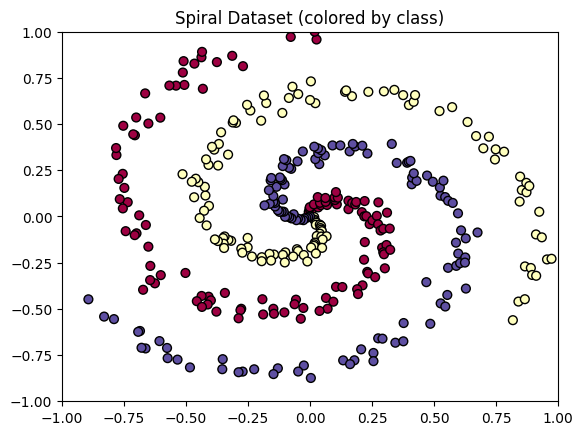

In [65]:
num_tendril = 3
data = toydata.ToyData(num_classes=num_tendril)


xtrain, ytrain, xtest, ytest = data.load_data()

fig, ax = data.plot_spiraldata()

### Accuracy

In [66]:
def accuracy(predictions, truth):
  predicted_labels = torch.argmax(predictions, axis=1)
  correct = (predicted_labels == truth).float()
  accuracy = correct.mean().item()
  return accuracy


In [67]:
from torch.nn import Linear # matrix

In [68]:
dense_layer  = Linear(2, 3, bias= True) # Linear(input, output)
dense_layer

Linear(in_features=2, out_features=3, bias=True)

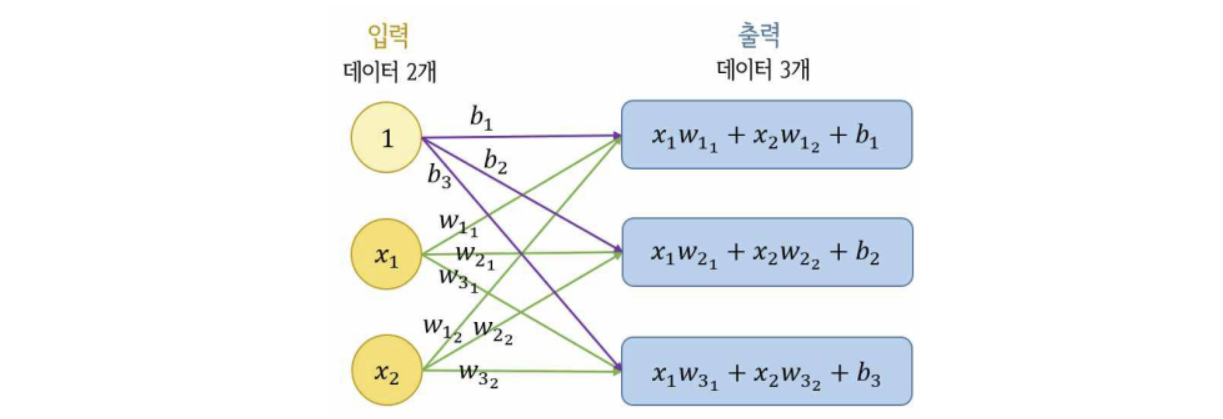

In [69]:
dense_layer.weight

Parameter containing:
tensor([[ 0.0543,  0.7067],
        [-0.5540,  0.4875],
        [ 0.1030,  0.3182]], requires_grad=True)

In [70]:
dense_layer.bias

Parameter containing:
tensor([-0.2277, -0.2336,  0.3402], requires_grad=True)

In [71]:
for param in dense_layer.parameters():
  print(type(param), param.size)

<class 'torch.nn.parameter.Parameter'> <built-in method size of Parameter object at 0x7a58635e98b0>
<class 'torch.nn.parameter.Parameter'> <built-in method size of Parameter object at 0x7a586351b6b0>


In [72]:
test_data = torch.rand(4, 2)
print(test_data)

dense_layer(test_data)  # (4, 2) x (2, 3) = (4, 3)

tensor([[0.4862, 0.6994],
        [0.8475, 0.9718],
        [0.7991, 0.0519],
        [0.0855, 0.2232]])


tensor([[ 0.2930, -0.1620,  0.6128],
        [ 0.5052, -0.2294,  0.7367],
        [-0.1476, -0.6510,  0.4390],
        [-0.0653, -0.1721,  0.4200]], grad_fn=<AddmmBackward0>)

In [73]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

 ### Model definition


In [74]:
class Model(nn.Module):
  def __init__(self, num_neurons, num_classes):
    # num_neurons : 사용할 node 개수 하이퍼파라미터
    # num_classes : 정답 라벨 개수
    super(Model, self).__init__()

    # input train data : dim = 2
    self.dense1 = nn.Linear(2, num_neurons)
    self.dense2 = nn.Linear(num_neurons, num_classes)

    # 가중치 초기화
    nn.init.kaiming_normal_(self.dense1.weight, mode='fan_in', nonlinearity='relu')
    nn.init.kaiming_normal_(self.dense2.weight, mode='fan_in', nonlinearity='relu')

  def forward(self, x):
    x = F.relu(self.dense1(x))
    x = self.dense2(x)
    return x

  @property
  def parameters(self):
    return tuple(self.dense1.parameters()) + tuple(self.dense2.parameters())


  def load_parameter(self, w1, b1, w2):
    self.dense1.weight.data = w1
    self.dense1.bias.data = b1
    self.dense2.weght.data = w2

### Learning

In [75]:
model = Model(num_neurons = 15, num_classes = 3)

In [76]:
import torch.optim as optim

In [81]:
optimizer = optim.SGD(model.parameters, lr = 0.1)

In [82]:
batch_size = 50

In [83]:
loss_values = []
acc_values = []

# 학습률 결정
for epoch_cnt in range(1000):
    idxs = np.arange(len(xtrain))
    np.random.shuffle(idxs)

    for batch_cnt in range(0, len(xtrain) // batch_size):
        batch_indices = idxs[batch_cnt * batch_size : (batch_cnt + 1) * batch_size]

        batch = xtrain[batch_indices]
        truth = ytrain[batch_indices]

        # numpy 배열을 torch 텐서로 변환
        batch = torch.tensor(batch, dtype=torch.float32)
        truth = torch.tensor(truth, dtype=torch.long)

        # 은닉층부터 출력층의 가중치 곱까지의 순전파에서 전달되는 값 구하기
        prediction = model(batch)

        # 출력층의 활성함수와 결합된 손실함수 값 구하기, cross_entropy 함수 활용
        loss = F.cross_entropy(prediction, truth)

        # 기울기 초기화
        optimizer.zero_grad()

        # torch의 자동미분 함수를 활용하여 역전파 진행
        loss.backward()

        # optimizer를 이용하여 경사하강의 한 스텝 진행
        optimizer.step()

        # 정확도 계산, acc라는 이름으로 저장
        acc = accuracy(prediction, truth)

    loss_values.append(loss.detach().clone().numpy())
    acc_values.append(acc)
    print(f"Epoch {epoch_cnt+1}----------------------------")
    print(f"loss: {loss.item():.6f}")
    print(f"acc: {acc:.6f}")

Epoch 1----------------------------
loss: 1.132696
acc: 0.320000
Epoch 2----------------------------
loss: 1.127634
acc: 0.220000
Epoch 3----------------------------
loss: 1.072590
acc: 0.320000
Epoch 4----------------------------
loss: 1.128600
acc: 0.260000
Epoch 5----------------------------
loss: 1.078053
acc: 0.360000
Epoch 6----------------------------
loss: 1.103922
acc: 0.200000
Epoch 7----------------------------
loss: 1.061007
acc: 0.300000
Epoch 8----------------------------
loss: 1.054111
acc: 0.360000
Epoch 9----------------------------
loss: 1.042279
acc: 0.360000
Epoch 10----------------------------
loss: 1.018055
acc: 0.380000
Epoch 11----------------------------
loss: 1.009407
acc: 0.400000
Epoch 12----------------------------
loss: 1.045957
acc: 0.360000
Epoch 13----------------------------
loss: 1.031457
acc: 0.360000
Epoch 14----------------------------
loss: 1.026820
acc: 0.320000
Epoch 15----------------------------
loss: 1.053580
acc: 0.300000
Epoch 16-----------

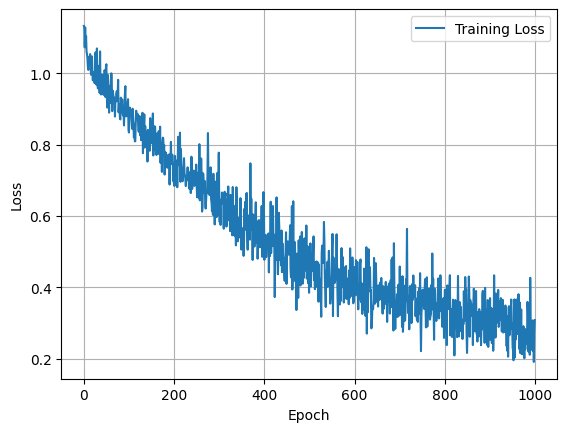

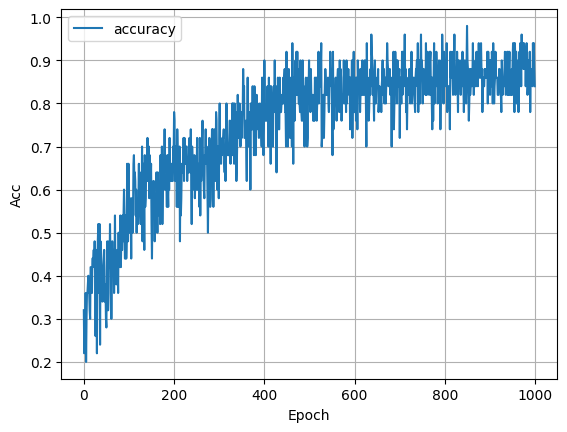

In [84]:
# Plotting loss values
plt.figure()
plt.plot(loss_values, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(acc_values, label="accuracy")
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend()
plt.grid()
plt.show()

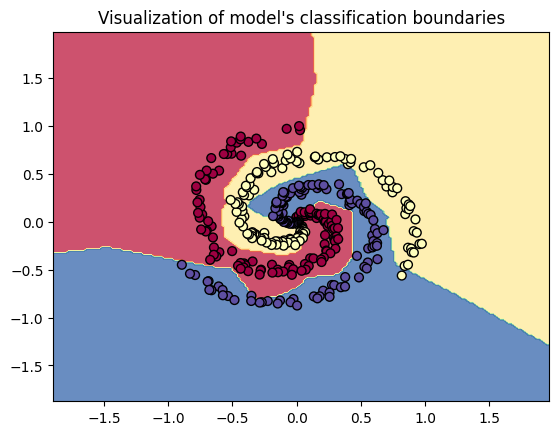

In [85]:
def dummy_function(x):
    if isinstance(x, np.ndarray):
        x = torch.tensor(x, dtype=torch.float32)
    return F.softmax(model(x), dim=1).detach().numpy()

fig, ax = data.visualize_model(dummy_function, entropy=False);